<a href="https://colab.research.google.com/github/AjeetChaudhary/ChatBot/blob/master/Covid19_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
library(tidyverse)
library(remotes)
library(lubridate)

In [0]:
install.packages('covid19.analytics')
install_version("forecast")
library(covid19.analytics)
library(forecast)

In [0]:
tsc=covid19.data(case="ts-confirmed")
india=tsc%>%filter(Country.Region=="India")
india=data.frame(t(india))
india=cbind(rownames(india),data.frame(india,row.names = NULL))

In [0]:
india=india[-c(1:4),]
colnames(india)=c('Date',"Confirmed")
india$Date=ymd(india$Date)
india$Confirmed=as.numeric(as.character(india$Confirmed))

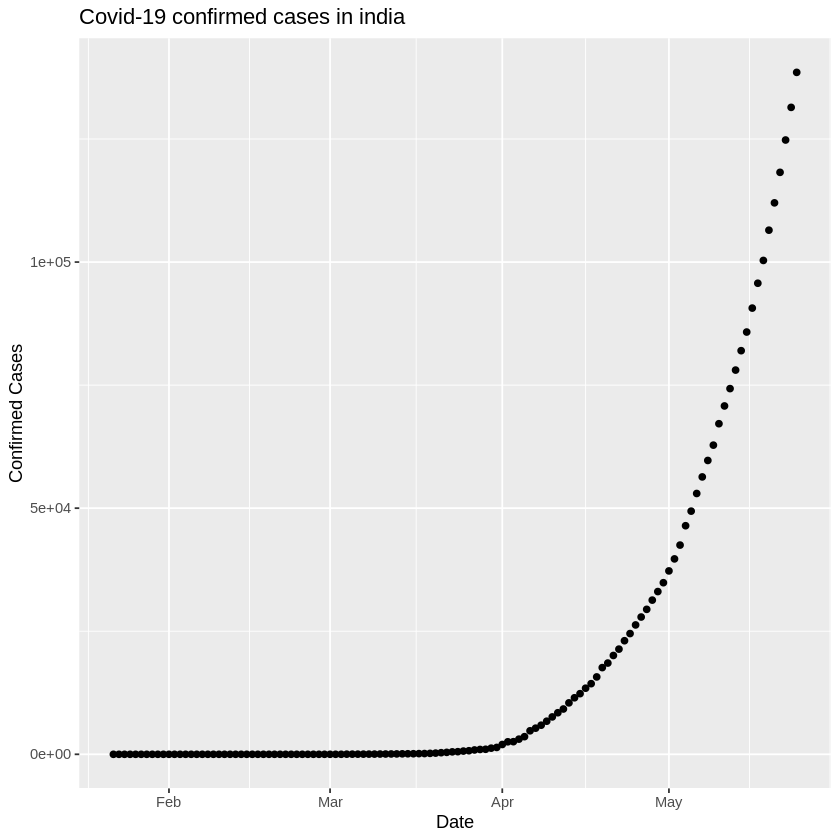

In [14]:

qplot(Date,Confirmed,data=india,main = "Covid-19 confirmed cases in india",ylab = "Confirmed Cases")

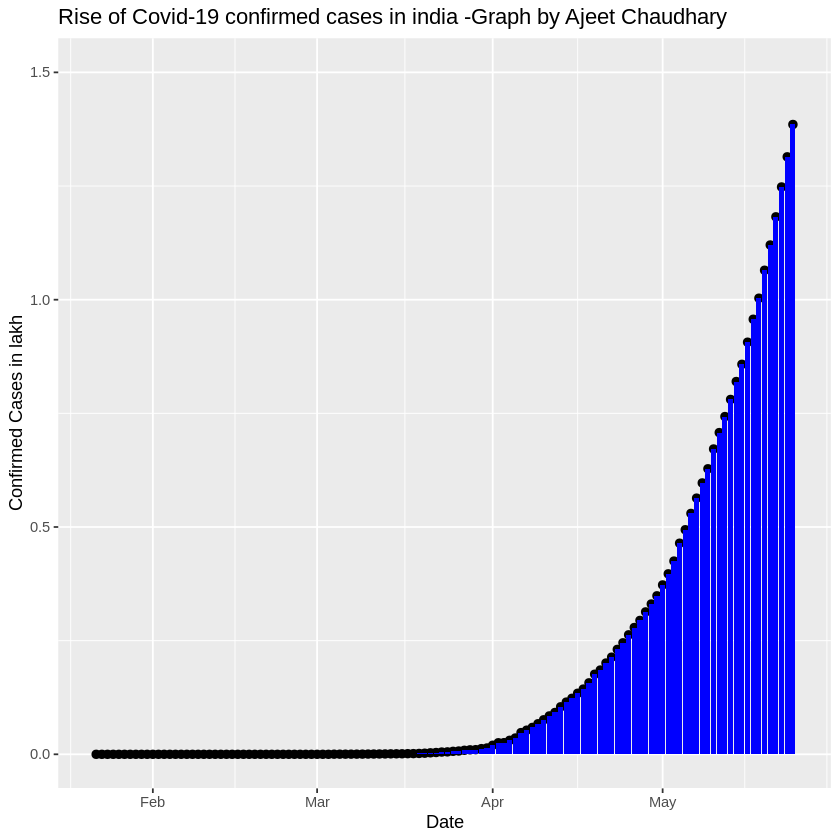

In [15]:
ggplot(india,aes(Date,Confirmed/100000))+geom_point(size=2)+geom_path(lwd=0)+geom_bar(stat = "identity",fill="blue")+ylab("Confirmed Cases in lakh")+
  geom_tile()+ggtitle("Rise of Covid-19 confirmed cases in india -Graph by Ajeet Chaudhary")+geom_text(x=5,y=5,label="xyz")+ylim(0,1.5)

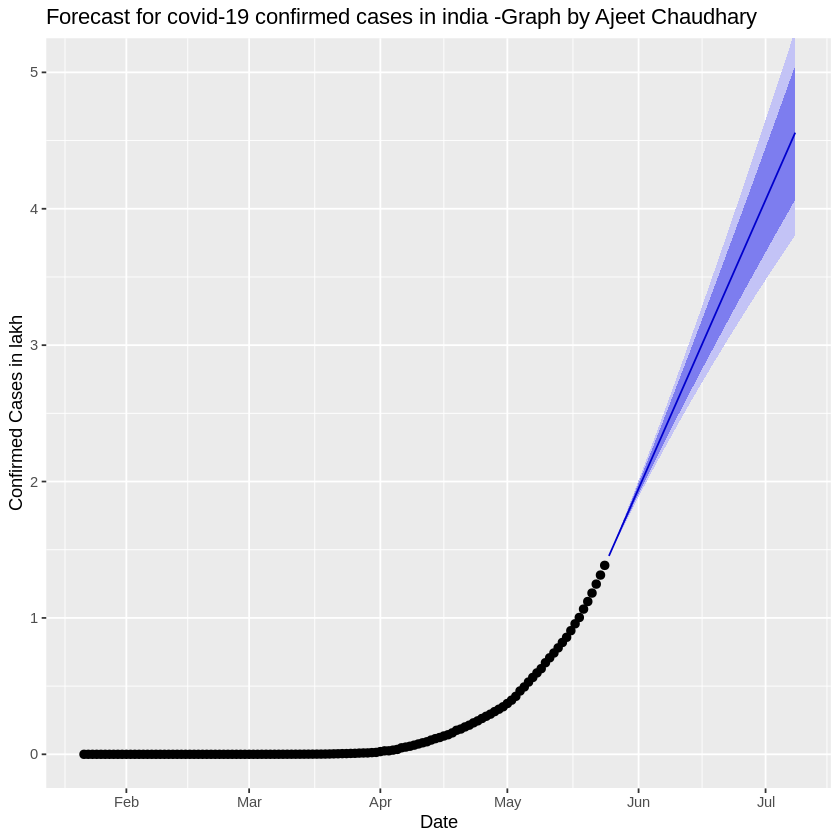

In [25]:
ggplot(india,aes(Date,Confirmed/100000))+geom_point(size=2)+ylab("Confirmed Cases in lakh")+
  geom_tile()+ggtitle("Forecast for covid-19 confirmed cases in india -Graph by Ajeet Chaudhary")+geom_text(x=5,y=5,label="xyz")+geom_forecast(h=45)+coord_cartesian(ylim = c(0,5))